In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
df = pd.read_excel("academic_performance.xlsx")
df

,Student_ID,Age,Study_Hours,Attendance_Percentage,Internal_Marks,Final_Grade
0,1,18,2,85,15,B
1,2,19,4,90,18,A
2,3,20,6,78,12,C
3,4,21,8,92,20,A
4,5,19,10,88,17,B
5,6,18,12,95,19,A
6,7,22,1,60,8,D
7,8,21,3,70,10,C
8,9,(blank),5,80,14,B
9,10,20,(blank),85,16,B


In [7]:
df.isnull().sum()


Student_ID               0
Age                      0
Study_Hours              0
Attendance_Percentage    0
Internal_Marks           0
Final_Grade              0
dtype: int64

In [9]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Study_Hours"].fillna(df["Study_Hours"].mean(), inplace=True)
df["Attendance_Percentage"].fillna(df["Attendance_Percentage"].mean(), inplace=True)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [11]:
df.dtypes


Student_ID                int64
Age                      object
Study_Hours              object
Attendance_Percentage    object
Internal_Marks            int64
Final_Grade              object
dtype: object

In [13]:
df["Age"].unique()


array([18, 19, 20, 21, 22, '(blank)', 23], dtype=object)

In [15]:
cols_to_convert = ["Age", "Study_Hours", "Attendance_Percentage"]

for col in cols_to_convert:
    df[col] = df[col].astype(str).str.strip()   # remove spaces
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [17]:
df.dtypes


Student_ID                 int64
Age                      float64
Study_Hours              float64
Attendance_Percentage    float64
Internal_Marks             int64
Final_Grade               object
dtype: object

In [21]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Study_Hours"].fillna(df["Study_Hours"].mean(), inplace=True)
df["Attendance_Percentage"].fillna(df["Attendance_Percentage"].mean(), inplace=True)


/tmp/ipykernel_7680/4281660116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipykernel_7680/4281660116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [24]:
df.isnull().sum()


Student_ID               0
Age                      0
Study_Hours              0
Attendance_Percentage    0
Internal_Marks           0
Final_Grade              0
dtype: int64

In [26]:
df.describe()


,Student_ID,Age,Study_Hours,Attendance_Percentage,Internal_Marks
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,19.928571,6.285714,83.214286,15.400000
std,4.472136,1.486332,3.971840,11.072350,4.732864
min,1.000000,18.000000,1.000000,60.000000,8.000000
25%,4.500000,19.000000,3.500000,79.000000,11.500000
50%,8.000000,20.000000,6.000000,85.000000,16.000000
75%,11.500000,21.000000,8.500000,90.000000,18.500000
max,15.000000,23.000000,15.000000,100.000000,25.000000


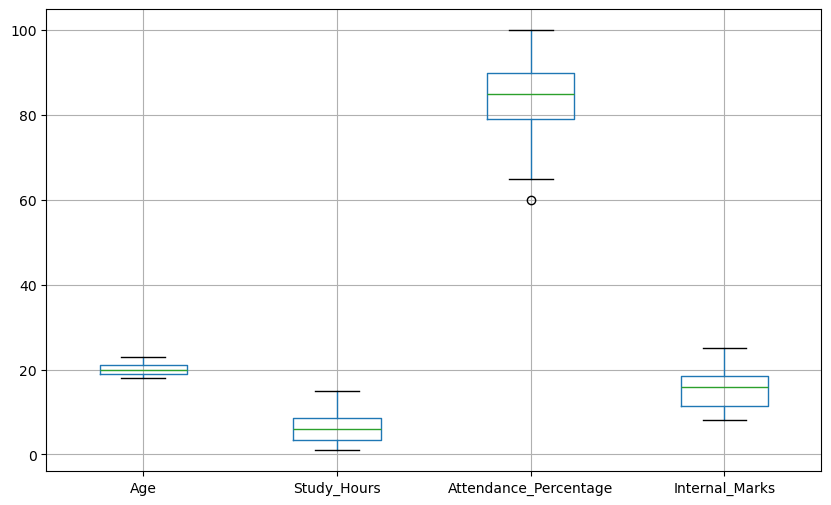

In [28]:
numeric_cols = ["Age", "Study_Hours", "Attendance_Percentage", "Internal_Marks"]

plt.figure(figsize=(10,6))
df[numeric_cols].boxplot()
plt.show()


In [30]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.clip(lower, upper)

df["Study_Hours"] = cap_outliers(df["Study_Hours"])
df["Internal_Marks"] = cap_outliers(df["Internal_Marks"])


In [32]:
df["Study_Hours"].skew()


0.7344542753493011

In [34]:
df["Log_Study_Hours"] = np.log1p(df["Study_Hours"])


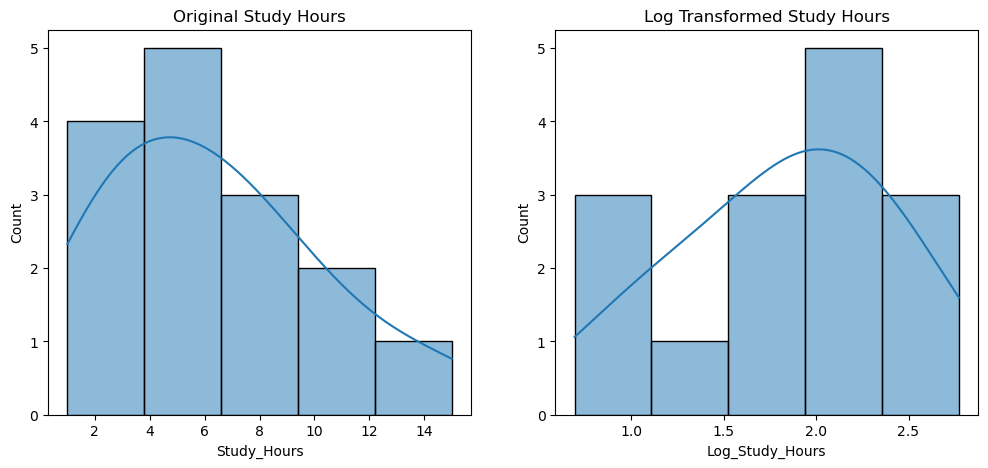

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Study_Hours"], kde=True)
plt.title("Original Study Hours")

plt.subplot(1,2,2)
sns.histplot(df["Log_Study_Hours"], kde=True)
plt.title("Log Transformed Study Hours")

plt.show()


In [38]:
df.head()


,Student_ID,Age,Study_Hours,Attendance_Percentage,Internal_Marks,Final_Grade,Log_Study_Hours
0,1,18.0,2.0,85.0,15,B,1.098612
1,2,19.0,4.0,90.0,18,A,1.609438
2,3,20.0,6.0,78.0,12,C,1.945910
3,4,21.0,8.0,92.0,20,A,2.197225
4,5,19.0,10.0,88.0,17,B,2.397895
